In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')


In [2]:
spotify = pd.read_csv('spotify.csv')

X = spotify.copy().dropna()
y = X.pop('track_popularity')

features_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']
features_cat = ['playlist_genre']

In [3]:
print(list(spotify))
print(spotify['playlist_genre'].unique())

['track_id', 'track_name', 'track_artist', 'track_popularity', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
['pop' 'rap' 'rock' 'latin' 'r&b' 'edm']


In [9]:
preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat)
)



splitter = GroupShuffleSplit(train_size=0.8)
train, test = next(splitter.split(X, y, groups=X['track_artist']))

X_train, X_test, y_train, y_test = X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test]

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

y_train = y_train/100
y_test = y_test/100

input_shape =[ X_train.shape[1]]

In [19]:
early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001,
    patience = 5,
    restore_best_weights = True
)

In [20]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape = input_shape),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu')
])

model.compile(
    optimizer = 'adam',
    loss = 'mae'
)

history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    batch_size = 256,
    epochs = 50,
    callbacks = [early_stopping],
    verbose = False
)

c:\Users\Dell\Files\Code\ML\machine_learning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Maximum Loss is 0.2090


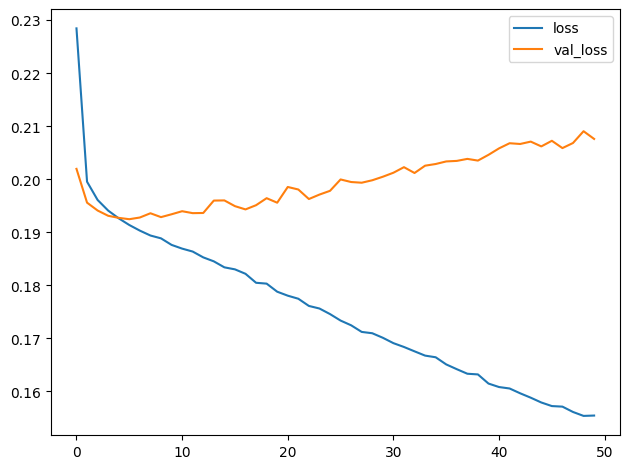

In [18]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss','val_loss']].plot()
print('Maximum Loss is {:0.4f}'.format(history_df['val_loss'].max()))

Maximum Loss is 0.2004


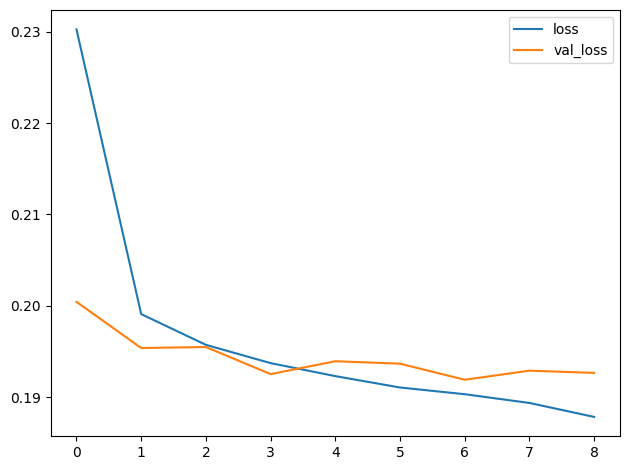

In [21]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss','val_loss']].plot()
print('Maximum Loss is {:0.4f}'.format(history_df['val_loss'].max()))